# MLOps Assignment-1: Group 90

## Group Members Name with Student ID:
<table style="margin-left: 0; text-align: left;">
  <tr>
    <th>BITS ID</th>
    <th>NAME</th>
    <th>CONTRIBUTION</th>
  </tr>
  <tr>
    <td>2024AA05119</td>
    <td>RANGA SRINIVASAN V</td>
    <td>100 %</td>
  </tr>
  <tr>
    <td>2024AA05012</td>
    <td>VAMSI A</td>
    <td>100 %</td>
  </tr>
  <tr>
    <td>2024AA05013</td>
    <td>GUNDUBOGULA YUKTHI MUKESH</td>
    <td>100 %</td>
  </tr>
  <tr>
    <td>2024AA05209</td>
    <td>NANTHAKUMAR M</td>
    <td>100 %</td>
  </tr>
  <tr>
    <td>2024AA05216</td>
    <td>NITESH SINGH</td>
    <td>100 %</td>
  </tr>
</table>

### Load and Prepare Dataset

We begin by loading the **processed Cleveland subset** of the UCI Heart Disease dataset. This step includes:

- Assigning column names for interpretability
- Handling missing values represented by `'?'`
- Dropping rows with missing data for this analysis
- Converting all features to numeric types

These preprocessing steps ensure the dataset is clean and ready for exploration and modeling.


In [1]:
# EDA for UCI Heart Disease Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed Cleveland subset of the dataset
df = pd.read_csv("../data/processed/uci_heart_extracted/processed.cleveland.data", header=None)

# Assign standard column names based on dataset documentation
df.columns = [
    "age",       # age in years
    "sex",       # sex (1 = male; 0 = female)
    "cp",        # chest pain type (1–4)
    "trestbps",  # resting blood pressure (in mm Hg)
    "chol",      # serum cholesterol (mg/dl)
    "fbs",       # fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    "restecg",   # resting electrocardiographic results (0–2)
    "thalach",   # maximum heart rate achieved
    "exang",     # exercise-induced angina (1 = yes; 0 = no)
    "oldpeak",   # ST depression induced by exercise relative to rest
    "slope",     # slope of the peak exercise ST segment
    "ca",        # number of major vessels (0–3) colored by fluoroscopy
    "thal",      # thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
    "target"     # diagnosis of heart disease (0 = no, 1+ = yes)
]

# Replace '?' with pandas' NA marker (missing value)
df.replace("?", pd.NA, inplace=True)

# Drop any rows with missing data to ensure clean EDA
df = df.dropna()

# Convert all columns to numeric (float), required for visualizations and modeling
df = df.astype(float)


### Dataset Overview and Target Distribution

We now examine the basic structure and statistical summary of the dataset:

- `df.info()` gives an overview of the columns, non-null counts, and data types.
- `df.describe()` provides statistical metrics such as mean, std, min, and quartiles.
- `df['target'].value_counts()` shows the distribution of the target variable.

This helps verify data integrity, understand feature scales, and assess class imbalance in the target.


In [2]:
# Display dataset structure and null count
df.info()

# Show descriptive statistics for numerical features
df.describe()

# Count distribution of target variable (0 = no disease, 1 = disease)
df['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    float64
dtypes: float64(14)
memory usage: 34.8 KB


target
0.0    160
1.0     54
2.0     35
3.0     35
4.0     13
Name: count, dtype: int64

### Class Distribution Visualization

To visually examine the balance of the target classes, we use a count plot:

- The `target` variable indicates the presence (1) or absence (0) of heart disease.
- Class imbalance can impact model performance and influence the choice of evaluation metrics (e.g., ROC-AUC over accuracy).

This plot helps assess whether special handling (e.g., stratified sampling or resampling) may be needed during model development.


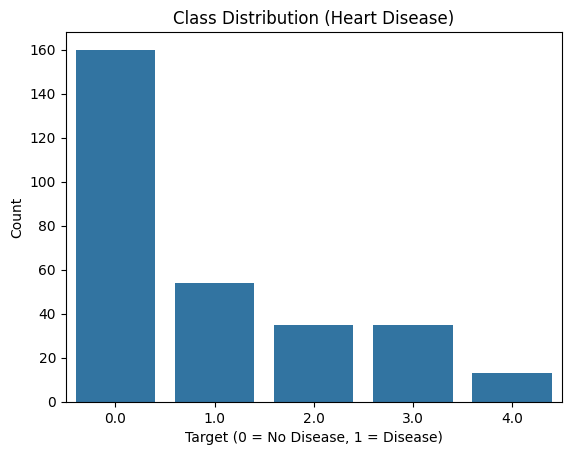

In [3]:
# Plot the class distribution of the target variable
sns.countplot(x='target', data=df)

# Add plot title and axis labels
plt.title("Class Distribution (Heart Disease)")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")

# Display the plot
plt.show()


### Feature Distributions

We use histograms to visualize the distribution of each numerical feature in the dataset. This provides insights into:

- Skewness or outliers in continuous variables (e.g., `chol`, `trestbps`)
- Bimodal or uniform distributions
- Potential need for feature scaling or transformation

Understanding these patterns helps inform preprocessing and model assumptions.


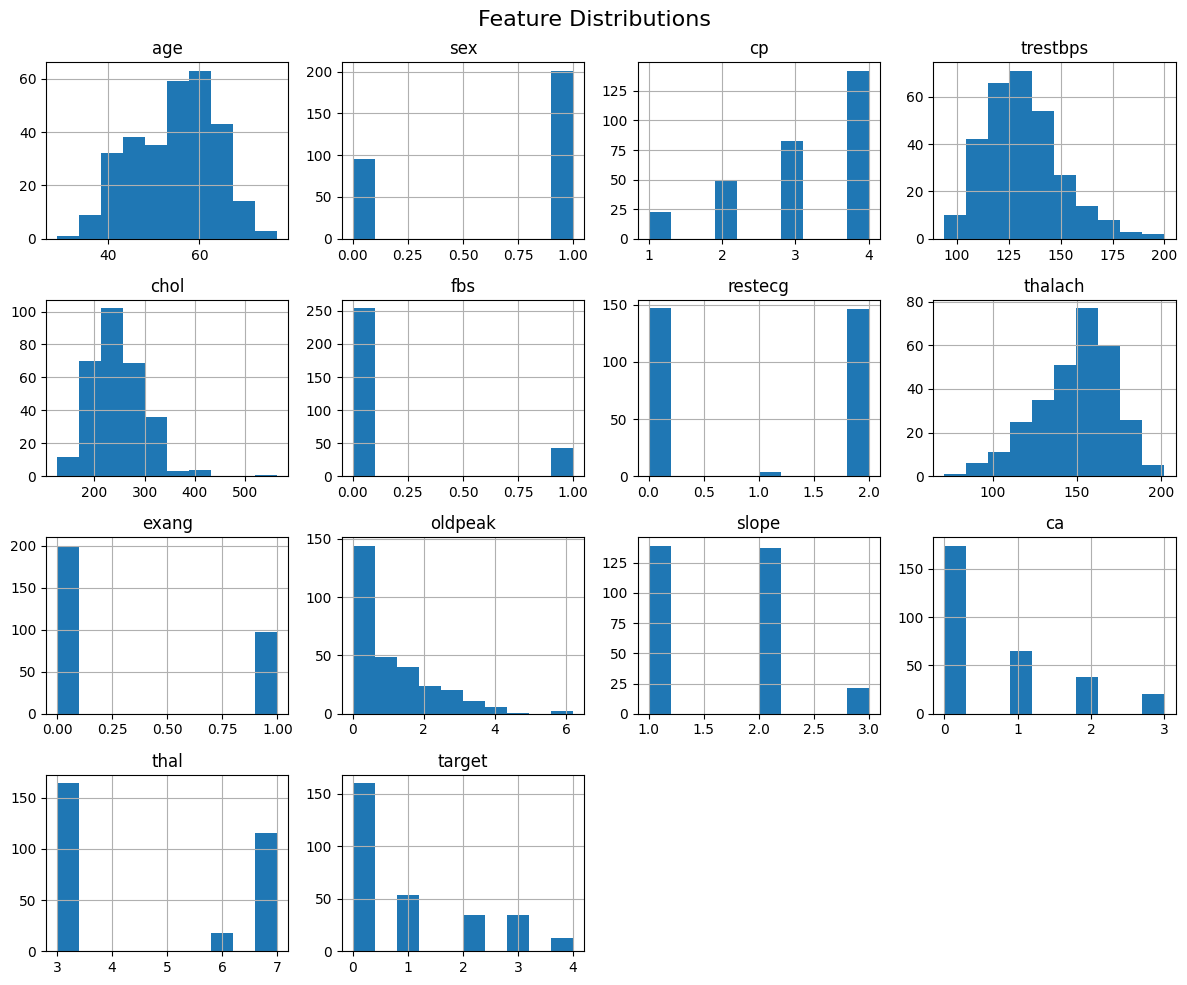

In [4]:
# Plot histograms for each numerical feature in the dataset
df.hist(figsize=(12, 10))  # Set overall figure size

# Add a main title to the entire figure
plt.suptitle("Feature Distributions", fontsize=16)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()


### Feature Correlation Heatmap

We compute and visualize the correlation matrix to:

- Identify relationships between input features
- Detect multicollinearity (highly correlated features like `thalach` and `age`)
- Understand how features relate to the target variable

This can help in feature selection and understanding feature importance trends.


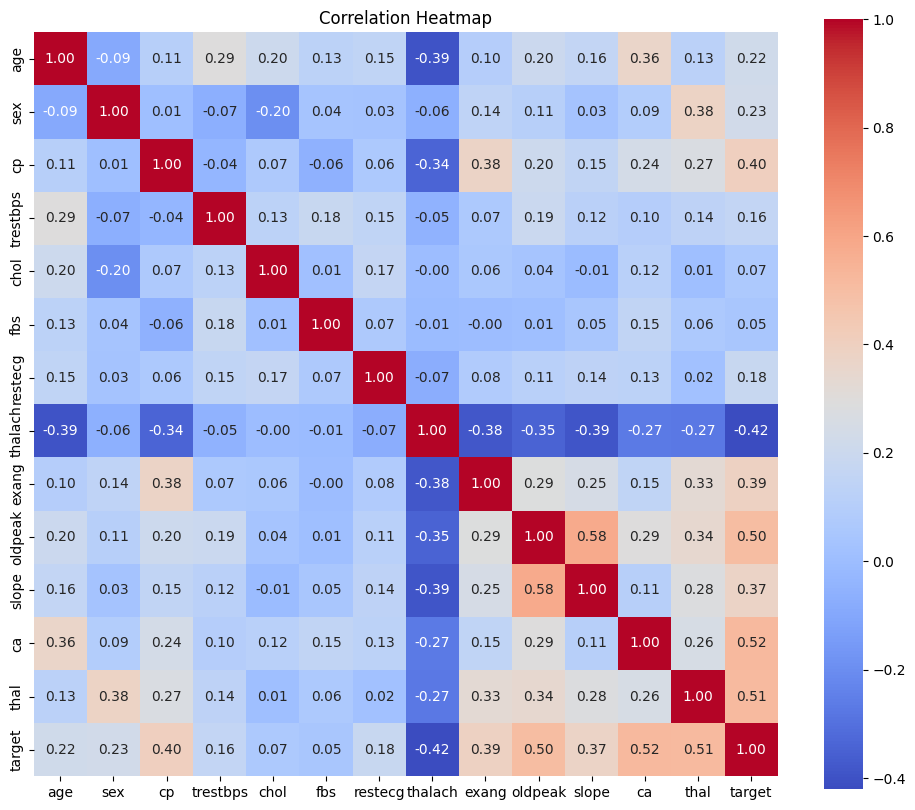

In [5]:
# Set up the plot size
plt.figure(figsize=(12, 10))

# Compute and plot the correlation heatmap
sns.heatmap(
    df.corr(),             # Compute correlation matrix
    annot=True,            # Display correlation coefficients
    fmt=".2f",             # Format to 2 decimal places
    cmap="coolwarm",       # Color scheme for clarity
    square=True            # Square cells for aesthetics
)

# Add title to the heatmap
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


### Selected Feature Pairplot

We use a pairplot to visualize pairwise relationships between selected features, colored by the target class.

- This helps identify separability between classes in 2D feature space.
- Visual patterns may suggest useful feature interactions or transformations.
- For example, combinations like `age` vs `thalach` or `chol` vs `oldpeak` may show class clustering trends.

This plot supports informed feature engineering and model interpretability.


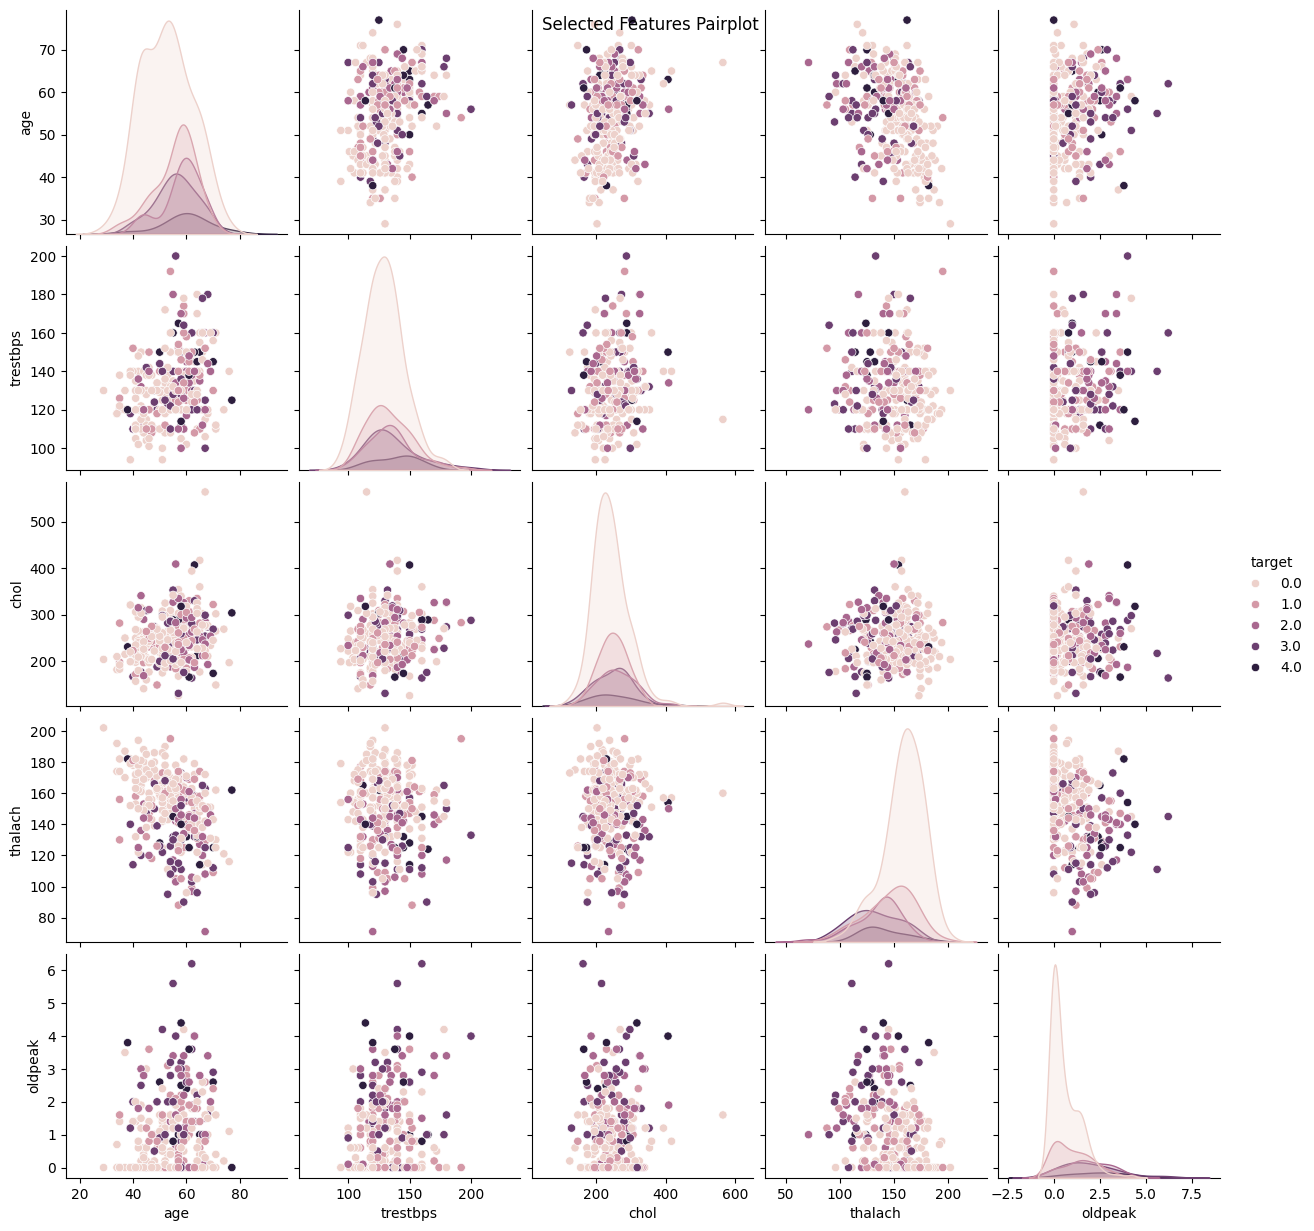

In [6]:
# Create a pairplot for selected features colored by target class
sns.pairplot(
    df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']],
    hue='target'  # Color code by class label
)

# Add an overall title
plt.suptitle("Selected Features Pairplot")

# Display the plot
plt.show()


### EDA Summary & Insights

- The dataset contains 14 features plus a binary `target` indicating heart disease presence.
- No missing values remain after cleaning (`?` entries were removed).
- Feature distributions vary widely:
  - `chol`, `trestbps`, and `thalach` show mild skewness.
  - Categorical variables like `cp`, `restecg`, and `thal` show discrete distributions.
- The target classes are **somewhat imbalanced**, with more samples in the "no disease" class.
- The correlation heatmap shows:
  - Strong negative correlation between `thalach` and `age`
  - Moderate positive correlation between `cp` and `target`
  - Most features have weak to moderate correlation with the target

**These insights inform our preprocessing choices and model selection in the next stage.**
